<a href="https://colab.research.google.com/github/jangsanghee/myrepo2/blob/main/1018_E_J_sanghee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib as mpl             # 기본 설정 만지는 용도
import matplotlib.pyplot as plt      # 그래프 그리는 용도
import matplotlib.font_manager as fm # 폰트 관련 용도

In [ ]:

!apt-get update -qq  #설치업데이트
!apt-get install fonts-nanum* -qq #font-nanum*설치

In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf' # 설치된 나눔 글꼴중 원하는 녀석의 전체
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

# 우선 fm._rebuild() 를 해주고 # 폰트 매니저 재빌드가 필요하다.
#fm._rebuild()

NanumGothic Eco


In [ ]:
import numpy as np

In [ ]:
mpl.rcParams['axes.unicode_minus']=False #음수표시가 되도록 설정

In [ ]:
pip install konlpy

In [ ]:
import nltk
from konlpy.tag import Kkma # 꼬꼬마
from konlpy.tag import Hannanum # 한나눔

In [ ]:
# wordcloud와 image 표시
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [ ]:
#데이터읽기
text = open('/Hamlet.txt').read()
text

'THE TRAGEDY OF HAMLET, PRINCE OF DENMARK\n\n\nby William Shakespeare\n\n\n\nDramatis Personae\n\n  Claudius, King of Denmark.\n  Marcellus, Officer.\n  Hamlet, son to the former, and nephew to the present king.\n  Polonius, Lord Chamberlain.\n  Horatio, friend to Hamlet.\n  Laertes, son to Polonius.\n  Voltemand, courtier.\n  Cornelius, courtier.\n  Rosencrantz, courtier.\n  Guildenstern, courtier.\n  Osric, courtier.\n  A Gentleman, courtier.\n  A Priest.\n  Marcellus, officer.\n  Bernardo, officer.\n  Francisco, a soldier\n  Reynaldo, servant to Polonius.\n  Players.\n  Two Clowns, gravediggers.\n  Fortinbras, Prince of Norway.  \n  A Norwegian Captain.\n  English Ambassadors.\n\n  Getrude, Queen of Denmark, mother to Hamlet.\n  Ophelia, daughter to Polonius.\n\n  Ghost of Hamlet\'s Father.\n\n  Lords, ladies, Officers, Soldiers, Sailors, Messengers, Attendants.\n\n\n\n\n\nSCENE.- Elsinore.\n\n\nACT I. Scene I.\nElsinore. A platform before the Castle.\n\nEnter two Sentinels-[first,]

In [ ]:
#wordcloud의 불용어 단어확인
print(type(STOPWORDS))
print(STOPWORDS)

<class 'set'>
{'as', 'ever', "i'm", "how's", 'after', 'what', "didn't", 'up', 'having', 'myself', 'they', 'had', 'herself', 'if', 'same', "aren't", 'while', "you're", "when's", 'by', 'get', "he's", 'than', "mustn't", 'between', 'too', "she'd", 'through', 'r', 'at', "you've", 'where', 'is', 'more', 'some', 'me', 'during', "there's", 'can', 'into', "let's", "you'd", 'him', 'your', 'just', "here's", 'about', 'are', 'when', "who's", "why's", 'nor', "don't", "wasn't", "can't", 'not', 'do', 'since', 'www', 'like', 'any', 'both', "doesn't", 'an', 'in', 'which', "you'll", 'before', 'does', "we'll", 'been', 'no', 'whom', "i've", "we'd", 'shall', 'such', 'should', 'then', 'his', "shouldn't", 'hers', 'it', 'you', 'otherwise', "weren't", "we're", 'under', 'could', "hadn't", 'http', 'doing', 'was', 'ours', 'theirs', 'being', 'how', 'he', 'a', 'above', 'once', 'down', 'com', 'or', 'ought', "he'd", 'be', 'also', 'ourselves', 'each', 'else', 'themselves', 'below', 'these', 'she', 'cannot', 'so', 'unti

In [ ]:
#불용어 단어 추가
stopwords = set(STOPWORDS)
stopwords.add("Hamlet")
stopwords.add("William")
stopwords.add("Shakespeare")

stopwords

{'Hamlet',
 'Shakespeare',
 'William',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'ot

In [ ]:
ham_mask = np.array(Image.open("/Hamlet_image.jpg"))
ham_mask[0]

array([[254, 254, 254],
       [254, 254, 254],
       [254, 254, 254],
       ...,
       [255, 255, 255],
       [254, 254, 254],
       [254, 254, 254]], dtype=uint8)

In [ ]:
wc=WordCloud(background_color = 'white', #배경색
             max_words = 2000,           #최대표시단어
             mask = ham_mask,            #마스크이미지
             contour_width = 3,          #외곽선
             contour_color = "steelblue" #글자색
             )

In [ ]:
wc.generate(text)
wc.words_ 

{'Ham': 1.0,
 'King': 0.6870229007633588,
 'will': 0.6603053435114504,
 'come': 0.5,
 'lord': 0.48854961832061067,
 'Hor': 0.41603053435114506,
 'Queen': 0.40076335877862596,
 'now': 0.37786259541984735,
 'let': 0.37786259541984735,
 'Hamlet': 0.3435114503816794,
 'thy': 0.3282442748091603,
 'Pol': 0.3053435114503817,
 'know': 0.29770992366412213,
 'sir': 0.29770992366412213,
 'love': 0.2862595419847328,
 'well': 0.2824427480916031,
 'make': 0.2786259541984733,
 'may': 0.27099236641221375,
 'go': 0.27099236641221375,
 'us': 0.26717557251908397,
 'lord Ham': 0.26717557251908397,
 'give': 0.2633587786259542,
 'speak': 0.2633587786259542,
 'Tis': 0.25572519083969464,
 'hath': 0.2480916030534351,
 'thou': 0.24427480916030533,
 'good': 0.24045801526717558,
 'say': 0.2366412213740458,
 'Laer': 0.2366412213740458,
 'father': 0.23282442748091603,
 'must': 0.23282442748091603,
 'thee': 0.22519083969465647,
 'Oph': 0.22137404580152673,
 'man': 0.21755725190839695,
 'upon': 0.2099236641221374,
 '

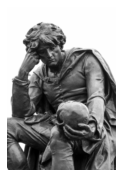

In [ ]:
plt.figure(figsize=(12, 3)) #크기
plt.imshow(ham_mask,cmap=plt.cm.gray, interpolation = 'bilinear')
plt.axis('off')
plt.show()

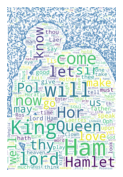

In [ ]:
plt.figure(figsize =(12, 3 ))
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.show()